### CATBOOST ( CATEGORY BOOSTING )

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)

### MODEL & TRAINING

In [4]:
!pip install catboost

You should consider upgrading via the 'c:\users\ertug\anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
import catboost
from catboost import CatBoostRegressor

In [8]:
cat_model = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 66.9ms	remaining: 1m 6s
1:	learn: 432.4168868	total: 76.2ms	remaining: 38s
2:	learn: 426.3836690	total: 86ms	remaining: 28.6s
3:	learn: 420.2261014	total: 91.1ms	remaining: 22.7s
4:	learn: 414.9976675	total: 96ms	remaining: 19.1s
5:	learn: 409.6125323	total: 101ms	remaining: 16.8s
6:	learn: 403.9277911	total: 112ms	remaining: 15.9s
7:	learn: 398.4395285	total: 117ms	remaining: 14.5s
8:	learn: 392.4517081	total: 124ms	remaining: 13.7s
9:	learn: 387.4871123	total: 130ms	remaining: 12.9s
10:	learn: 382.6230510	total: 135ms	remaining: 12.1s
11:	learn: 378.1012454	total: 139ms	remaining: 11.5s
12:	learn: 372.6002306	total: 144ms	remaining: 11s
13:	learn: 368.4682192	total: 148ms	remaining: 10.4s
14:	learn: 364.0565766	total: 152ms	remaining: 10s
15:	learn: 359.5683249	total: 156ms	remaining: 9.62s
16:	learn: 355.1782794	total: 160ms	remaining: 9.28s
17:	learn: 350.4689946	total: 166ms	remaining: 9.08s
18:	learn: 346.2553348	total: 1

In [10]:
y_pred = cat_model.predict(X_test)

In [12]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

350.2683163098795

In [13]:
r2_score(y_test, y_pred)

0.43324903699954187

### MODEL TUNING

In [14]:
catboost_params = {"iterations": [200, 500, 100, 2000],
                   "learning_rate": [.01, .1],
                   "depth": [3, 6, 8]}

In [16]:
catboost_cv_model = GridSearchCV(cat_model, catboost_params, cv=5, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  9.8min finished


0:	learn: 425.7900818	total: 3.29ms	remaining: 654ms
1:	learn: 404.8723520	total: 7.06ms	remaining: 699ms
2:	learn: 387.4057666	total: 8.45ms	remaining: 555ms
3:	learn: 372.2801584	total: 10ms	remaining: 490ms
4:	learn: 358.9204229	total: 11.4ms	remaining: 443ms
5:	learn: 347.0083933	total: 12.8ms	remaining: 413ms
6:	learn: 336.0130818	total: 14.1ms	remaining: 390ms
7:	learn: 324.3923300	total: 15.7ms	remaining: 377ms
8:	learn: 314.8690957	total: 17.2ms	remaining: 366ms
9:	learn: 308.5075563	total: 18.8ms	remaining: 356ms
10:	learn: 298.8587285	total: 20.3ms	remaining: 349ms
11:	learn: 294.7655438	total: 21.7ms	remaining: 340ms
12:	learn: 288.0697862	total: 23ms	remaining: 331ms
13:	learn: 282.6697154	total: 24.3ms	remaining: 323ms
14:	learn: 277.6121667	total: 25.8ms	remaining: 318ms
15:	learn: 273.4383979	total: 27.6ms	remaining: 318ms
16:	learn: 269.1556201	total: 29ms	remaining: 312ms
17:	learn: 264.8098704	total: 30.3ms	remaining: 306ms
18:	learn: 261.6700768	total: 31.5ms	remaini

In [17]:
catboost_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [19]:
catboost_tuned = CatBoostRegressor(learning_rate=catboost_cv_model.best_params_.get("learning_rate"),
                               depth=catboost_cv_model.best_params_.get("depth"),
                               iterations=catboost_cv_model.best_params_.get("iterations")).fit(X_train,
                                                                                                y_train)

0:	learn: 425.7900818	total: 1.75ms	remaining: 349ms
1:	learn: 404.8723520	total: 5.72ms	remaining: 567ms
2:	learn: 387.4057666	total: 7.34ms	remaining: 482ms
3:	learn: 372.2801584	total: 8.99ms	remaining: 441ms
4:	learn: 358.9204229	total: 10.5ms	remaining: 408ms
5:	learn: 347.0083933	total: 12.1ms	remaining: 391ms
6:	learn: 336.0130818	total: 13.6ms	remaining: 374ms
7:	learn: 324.3923300	total: 15.8ms	remaining: 379ms
8:	learn: 314.8690957	total: 18.7ms	remaining: 397ms
9:	learn: 308.5075563	total: 20.1ms	remaining: 383ms
10:	learn: 298.8587285	total: 21.5ms	remaining: 369ms
11:	learn: 294.7655438	total: 24ms	remaining: 376ms
12:	learn: 288.0697862	total: 27.5ms	remaining: 395ms
13:	learn: 282.6697154	total: 29.4ms	remaining: 390ms
14:	learn: 277.6121667	total: 30.6ms	remaining: 378ms
15:	learn: 273.4383979	total: 32.1ms	remaining: 369ms
16:	learn: 269.1556201	total: 33.4ms	remaining: 360ms
17:	learn: 264.8098704	total: 34.8ms	remaining: 352ms
18:	learn: 261.6700768	total: 36.2ms	rem

In [20]:
y_pred = catboost_tuned.predict(X_test)

In [21]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

344.3125832615482

In [22]:
r2_score(y_test, y_pred)

0.4523585058891635

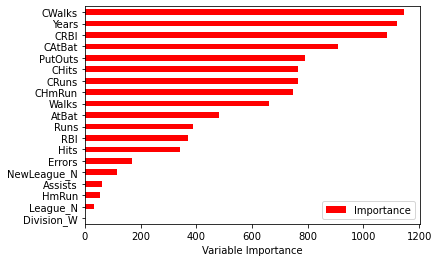

In [23]:
Importance = pd.DataFrame({"Importance":catboost_tuned.feature_importances_*100},
                           index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r")  # ascerding --> büyükten küçüğe
plt.xlabel("Variable Importance");
# plt.gca().legend_ = None